In [11]:
! pip install tensorflow numpy opencv-python keras pandas mediapipe google.colab

ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf  # Import TensorFlow
import pandas as pd

from tensorflow import keras  # Import Keras
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from matplotlib import pyplot as plt

2025-04-28 12:07:57.086559: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 12:07:57.217979: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 12:07:57.291551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745831277.410131    7817 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745831277.439085    7817 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 12:07:57.630089: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
! pip show mediapipe


Name: mediapipe
Version: 0.10.21
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: /home/deadstar/Documents/Amharic_Sign_Language/.venv/lib/python3.10/site-packages
Requires: absl-py, attrs, flatbuffers, jax, jaxlib, matplotlib, numpy, opencv-contrib-python, protobuf, sentencepiece, sounddevice
Required-by: 


In [3]:
import csv
import ast
import numpy as np

X_data = []
y_data = []

train_output_path = "/home/deadstar/Documents/Amharic_Sign_Language/static_train_ouput.csv"
with open(train_output_path, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        landmark = np.array(ast.literal_eval(row["landmark"]))  # shape: (21, 2)
        encoding = np.array(ast.literal_eval(row["encoding"]))  # shape: (10,)

        X_data.append(landmark)
        y_data.append(encoding)

# Convert to NumPy arrays
X_train = np.array(X_data)  # shape: (num_samples, 21, 2)
y_train = np.array(y_data)  # shape: (num_samples, 10)

print("X shape:", X_train.shape)
print("y shape:", y_train.shape)
print(X_train[0])

X shape: (495, 21, 2)
y shape: (495, 33)
[[-0.47997004  0.25145636]
 [-0.19652732  0.76834307]
 [ 0.00821337  0.81632661]
 [ 0.16550388  0.84515164]
 [ 0.32535475  1.        ]
 [ 0.04623465  0.23207582]
 [ 0.22882492  0.16423904]
 [ 0.35622632  0.13353405]
 [ 0.47801243  0.07816242]
 [ 0.01931254  0.0913957 ]
 [ 0.23102331  0.03317238]
 [ 0.38706751  0.02195604]
 [ 0.50439422 -0.00977705]
 [-0.01473724 -0.07880584]
 [ 0.20323355 -0.08741202]
 [ 0.34197281 -0.04574369]
 [ 0.46513729 -0.04080614]
 [-0.05080995 -0.24466568]
 [ 0.14510981 -0.21349707]
 [ 0.27171722 -0.15017593]
 [ 0.39161283 -0.10634443]]


In [4]:
import csv
import ast
import numpy as np

X_data = []
y_data = []

test_output_path = "/home/deadstar/Documents/Amharic_Sign_Language/static_test_ouput.csv"
with open(test_output_path, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        landmark = np.array(ast.literal_eval(row["landmark"]))  # shape: (21, 2)
        encoding = np.array(ast.literal_eval(row["encoding"]))  # shape: (10,)

        X_data.append(landmark)
        y_data.append(encoding)

# Convert to NumPy arrays
X_test = np.array(X_data)  # shape: (num_samples, 21, 2)
y_test = np.array(y_data)  # shape: (num_samples, 10)

print("X shape:", X_test.shape)
print("y shape:", y_test.shape)
print(X_test)

X shape: (165, 21, 2)
y shape: (165, 33)
[[[-0.12204395  0.93344829]
  [ 0.29710872  0.87040636]
  [ 0.51310943  0.6052178 ]
  ...
  [-0.04661332 -0.2568929 ]
  [ 0.14328512 -0.37311921]
  [ 0.31750526 -0.46723346]]

 [[-0.12174695  0.9641697 ]
  [ 0.29638569  1.        ]
  [ 0.51186075  0.77063004]
  ...
  [-0.04649988 -0.28505039]
  [ 0.14293642 -0.36218331]
  [ 0.31673259 -0.41961783]]

 [[-0.12174695  0.9641697 ]
  [ 0.29638569  1.        ]
  [ 0.51186075  0.77063004]
  ...
  [-0.04649988 -0.28505039]
  [ 0.14293642 -0.36218331]
  [ 0.31673259 -0.41961783]]

 ...

 [[-1.         -0.21090132]
  [-0.83176952  0.08403864]
  [-0.50732722  0.25441988]
  ...
  [-0.14156184  0.15758331]
  [-0.36166561  0.0952222 ]
  [-0.42396509 -0.03580032]]

 [[-0.07231256  1.        ]
  [ 0.07227786  0.69679067]
  [ 0.33322657  0.45415879]
  ...
  [ 0.16498177  0.16020131]
  [ 0.06377936  0.39241725]
  [ 0.06872314  0.38211174]]

 [[-1.         -0.21090132]
  [-0.83176952  0.08403864]
  [-0.50732722  0

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 21, 64)         │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 21, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 10, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_6      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 33)             │         1,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,865 (65.88 KB)

 Trainable params: 16,545 (64.63 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0200 - loss: 3.8370
Epoch 2/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0471 - loss: 3.5501 
Epoch 3/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0934 - loss: 3.1957
Epoch 4/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1189 - loss: 3.1457 
Epoch 5/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1567 - loss: 3.0326
Epoch 6/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2175 - loss: 2.8818
Epoch 7/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2324 - loss: 2.8865
Epoch 8/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2286 - loss: 2.8179
Epoch 9/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3037 - loss: 2.6340
Epoch 10/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2774 - loss: 2.6294
Epoch 11/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2948 - loss: 2.5545
Epoch 12/150
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accurac

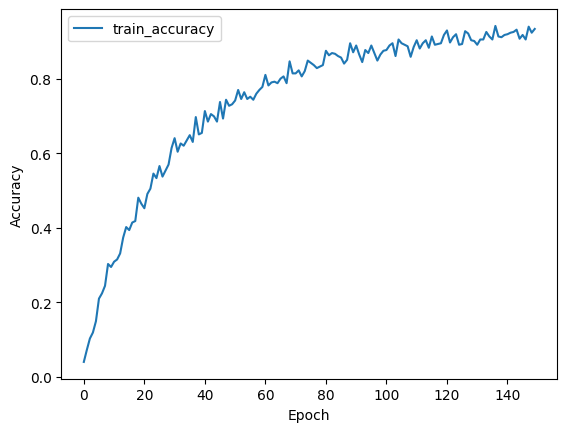

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

class CNN:
    def __init__(self, input_shape, num_classes):
        self.num_classes = num_classes
        self.input_shape = input_shape

    def build_model(self):
            
        model = Sequential([
        # Input Layer
        tf.keras.layers.Input(shape=input_shape),

        # Convolutional Blocks (Reduced Complexity)
        Conv1D(64, kernel_size=5, padding='same', activation=None),  # Reduced filters
        BatchNormalization(),
        Activation('relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        Conv1D(64, kernel_size=3, padding='same', activation='relu'),  # Reduced filters
        BatchNormalization(),
        GlobalAveragePooling1D(),  # Or GlobalMaxPooling1D()

        # Dense Layers (Reduced Complexity)
        Dense(32, activation=None),  # Reduced units
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')  # Output layer
            ])

        model.compile(optimizer=Adam(learning_rate=0.0005),  # Adjusted learning rate
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model


# Model Creation
input_shape = (X_train.shape[1], X_train.shape[2])  # (21, 2)
num_classes = 33
model = CNN(input_shape, num_classes).build_model()
model.summary()

early_stopping = EarlyStopping(monitor='val_accuracy',  # Changed to val_accuracy
                                 patience=30,
                                 restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=150,  # Increased epochs
                    batch_size=16, callbacks=[early_stopping])

# (Optional) Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 42), dtype=float32). Expected shape (None, 21, 2), but input has incompatible shape (1, 42)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 42), dtype=float32)
  • training=False
  • mask=None

In [1]:
import numpy as np

class Normalization:
    def __init__(self):
        """
        mcp_indices: Indcies of hte MCP joints
            5: Represent the Index finger
            9: Represent the Middle finger
            13: Represent the Ring finger
            17: Represent the Pinky finger
        """
        self.mcp_indices = [5, 9, 13, 17]

    def bbox_normalize_landmarks(self, landmarks, roi, image_width, image_height):
        """
        Normalizes landmarks relative to the bounding box (roi).

        Args:
            landmarks: List of landmarks with normalized coordinates (x, y) relative to full image.
            roi: Tuple (roi_x_min, roi_y_min, roi_x_max, roi_y_max) in pixel coordinates.

        Returns:
            landmarks_normalized: Landmarks normalized to [0,1] within the ROI box.
        """
        roi_x_min, roi_y_min, roi_x_max, roi_y_max = roi

        width = roi_x_max - roi_x_min
        height = roi_y_max - roi_y_min

        landmarks_px = np.array([[lm.x, lm.y] for lm in landmarks])

        landmarks_px[:, 0] = (landmarks_px[:, 0] * image_width - roi_x_min) / width
        landmarks_px[:, 1] = (landmarks_px[:, 1] * image_height - roi_y_min) / height

        return landmarks_px

    def center_hand_landmark(self, landmarks):
        """
        Centers the hand landmarks around the palm center.
        
        Args:
            landmarks: The hand landmarks (numpy array).
        """
        mcp_joints = landmarks[self.mcp_indices]
        center = np.mean(mcp_joints, axis=0)
        centered = landmarks - center
        return centered
    
    def scale_hand_landmark(self, landmarks):
        """
        Scales the hand landmarks based on the distance from the MCP joints to the center.
        
        Args:
            landmarks: The hand landmarks (numpy array).
        """
        mcp_joints = landmarks[self.mcp_indices]
        center = np.mean(mcp_joints, axis=0)
        dists = np.linalg.norm(mcp_joints - center, axis=1)
        scale = np.mean(dists)
        if scale < 1e-6:
            scale = 1e-6
        return landmarks / scale
    
    def rotate_hand_landmark(self, landmarks):
        """
        Rotates the hand landmarks to align the index finger (MCP joint) upward.
        
        Args:
            landmarks: The hand landmarks (numpy array).
        """
        # Align L9 (index MCP) upward
        vec = landmarks[9]
        reference = np.array([0, -1])
        dot = np.dot(vec, reference)
        det = vec[0] * reference[1] - vec[1] * reference[0]
        theta = np.arctan2(det, dot)
    
        cos_t = np.cos(-theta)
        sin_t = np.sin(-theta)
        R = np.array([
            [cos_t, -sin_t],
            [sin_t,  cos_t]
        ])
    
        return landmarks @ R.T
    
    def normalize_hand_landmarks(self, landmarks):
        """
        Normalizes the hand landmarks by centering, scaling, and rotating.
        
        Args:
            landmarks: The hand landmarks (numpy array).
        """
        centered_landmarks = self.center_hand_landmark(landmarks)
        scaled_landmarks = self.scale_hand_landmark(centered_landmarks)
        rotated_landmarks = self.rotate_hand_landmark(scaled_landmarks)
        
        # New: normalize to [-1, 1] range
        max_val = np.max(np.abs(rotated_landmarks))
        if max_val > 0:
            rotated_landmarks = rotated_landmarks / max_val

        return rotated_landmarks

In [2]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np

class MediaPipeWrapper:
    def __init__(self):
        """
        Initializes the MediaPipe wrapper for hand detection.
        """
        self.base_option = python.BaseOptions(model_asset_path='./hand_landmarker.task')
        self.option = vision.HandLandmarkerOptions(base_options=self.base_option,
                                                   num_hands=2)
        self.detector = vision.HandLandmarker.create_from_options(self.option)
        
    def detect_hands(self, frame):
        """
        Detects hands in the image using MediaPipe HandLandmarker (Tasks API).
        
        Args:
            frame: Input image (numpy array, BGR).
        """
        H, W, _ = frame.shape
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        result = self.detector.detect(mp_image)
        return result

    def extract_hand_roi(self, frame):
        """
        Extracts the cropped hand region and landmarks from the input frame.

        Args:
            frame: Input image (numpy array, BGR).
        Returns:
            hand_roi: Cropped hand image (numpy array) or None if no hand detected.
            hand_landmarks: List of landmarks or None if no hand detected.
        """
        result = self.detect_hands(frame)

        H, W, _ = frame.shape

        if not result.hand_landmarks:
            return None, None, None  # No hands detected

        # Assume first detected hand
        hand_landmarks = result.hand_landmarks[0]

        x_coords = [lm.x for lm in hand_landmarks]
        y_coords = [lm.y for lm in hand_landmarks]

        x_min = int(min(x_coords) * W)
        y_min = int(min(y_coords) * H)
        x_max = int(max(x_coords) * W)
        y_max = int(max(y_coords) * H)

        margin_x = int(0.3 * (x_max - x_min))
        margin_y = int(0.3 * (y_max - y_min))

        roi_x_min = max(0, x_min - margin_x)
        roi_y_min = max(0, y_min - margin_y)
        roi_x_max = min(W, x_max + margin_x)
        roi_y_max = min(H, y_max + margin_y)

        hand_roi = frame[roi_y_min:roi_y_max, roi_x_min:roi_x_max]

        roi = (roi_x_min, roi_y_min, roi_x_max, roi_y_max)

        return hand_roi, hand_landmarks, roi

# # === USAGE ===
# wrapper = MediaPipeWrapper()
# # 
# # # Load your image
# frame = cv2.imread('./cropped_hand.jpg')  # 👈
# print(frame.shape)
# landmark = wrapper.detect_hands(frame)
# print(landmark)
# # Resize image before processing (important!)
# #frame = cv2.resize(frame, (640, 480))
# #
# #cv2.imshow('Original Image', frame)
# #cv2.waitKey(0)
# #cv2.destroyAllWindows()
# #'''
# 
# cropped_hand = wrapper.extract_hand_roi(frame)
# 
# # Define your desired window width and height
# desired_width = 800
# desired_height = 600
# 
# if cropped_hand is not None:
#     save_path = 'cropped_hand.jpg'  # 👈 where you want to save
#     cv2.imwrite(save_path, cropped_hand)
# else:
#     print("No hand detected.")
# 
# cv2.waitKey(0)
# cv2.destroyAllWindows()

2025-04-30 09:38:11.022133: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 09:38:11.029225: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-30 09:38:11.045258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745995091.068998   25665 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745995091.076254   25665 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-30 09:38:11.099878: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
import pandas as pd
import tensorflow as tf
import cv2
import numpy as np
import os 
import mediapipe as mp
import cv2

class ImagePreProcessor:
    def __init__(self, num_classes):
        """
        Initializes the ImagePreProcessor with  normalziation object
        """

        self.normalization = Normalization()
        self.mediapipewrapper = MediaPipeWrapper()
        self.hand_visualizer = HandVisualizer()
        self.num_classes = num_classes

    def load_labels(self, label_path):
        """
        Load labels from the label file.
        """
        df = pd.read_csv(label_path)
        return dict(zip(df['filename'], df['class']))\

    def one_hot_encoding(self, y):
        """
        Convert labels to one-hot encoding.
        
        Args:
            y: List of labels to be converted.
        """

        sorted_labels = sorted(set(y)) # unique soted labels
        label_to_index = {label: idx for idx, label in enumerate(sorted_labels)}
        indices = [label_to_index[label] for label in y]
        return (tf.one_hot(indices, depth=self.num_classes), y)
    
    def load_single_image(self, frame, show=False):
        # frame = cv2.imread(file)
        
        H, W, _ = frame.shape
        
        hand_roi, hand_landmarks, roi = self.mediapipewrapper.extract_hand_roi(frame)

        if hand_roi is None:
            # raise ValueError(f"Hand not detected in image: {frame}")
            return None, None , None

        landmark_px = self.normalization.bbox_normalize_landmarks(hand_landmarks, roi, W, H)
        
        if show:
            annotated_image = self.hand_visualizer.draw_landmarks_on_image(hand_roi, hand_landmarks)
            self.hand_visualizer.draw_hand(annotated_image)
        return landmark_px

    def load_multiple_images(self, image_path, lable_path):
        """
        Load images from a direcotry
        Extract landmarks from each image
        Normalize the landmarks
        Return the normalized landmarks and labels
        
        Args:
            image_path: Path to the image file.
            label_path: Path to the label file.
        """
        
        X = []
        y = []
        labels = self.load_labels(lable_path)
        
        files = sorted([
            f for f in os.listdir(image_path) 
            if f.lower().endswith(('.jpg', '.jpeg', '.png')) and not f.startswith('invert')
        ])
        
        for file in files:
            file_path = os.path.join(image_path, file)
            
            normalized_landmarks = self.load_single_image(file_path)
            
            if normalized_landmarks is not None:
                X.append(normalized_landmarks)
                label =  labels.get(file, -1)
                if label == -1:
                    print(f"Warning: Missing label for {file}")
                y.append(label)
            else:
                print(f"Warning: Skipping {file} due to missing hand landmarks")

        y = self.one_hot_encoding(np.array(y))
        
        return np.array(X), y

In [ ]:

#Save entire model (architecture + weights)
# model.save("model-cnn-normalized-augmented-84.keras")
#Load model
#from tensorflow.keras.models import load_model
# model = load_model("model-cnn-full-roi-extra-augmented.h5")

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7635 - loss: 0.7348  
Test accuracy: 0.75


In [4]:
import cv2
import matplotlib.pyplot as plt

class HandVisualizer:
    def __init__(self):
        pass
    
    def draw_landmarks_on_image(self, image, detection_result):
        """
        Draws hand landmarks on the image.
        
        Args:
            image: The input image (numpy array).
            detection_result: The result of hand detection containing landmarks.
        """
        # Convert the image to an OpenCV format
        annotated_image = image.copy()

        for hand_landmarks in detection_result.hand_landmarks:
            for landmark in hand_landmarks:
                x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
                cv2.circle(annotated_image, (x, y), 5, (0, 255, 0), -1)

        return annotated_image
    
    def daraw_hand(self, hand_roi):
        """
        Draws the Region of Interest (ROI) for the hand.
        
        Args:
            hand_roi: The Region of Interest (ROI) for the hand (numpy array).
        """
        # Convert to RGB for displaying in matplotlib
        hand_roi_rgb = cv2.cvtColor(hand_roi, cv2.COLOR_BGR2RGB)

        # Display the ROI in the notebook
        plt.imshow(hand_roi_rgb)
        plt.axis('off')  # Hide axis
        plt.show()


In [77]:
import cv2
import os
import time

image_procssor = ImagePreProcessor(num_classes=33)
normalizer = Normalization()

def capture_image_from_camera(save_path='Amharic_Sign_Language/le.jpg'):
    cap = cv2.VideoCapture(0)  # Open default camera

    print("📸 Camera is ready. Press Enter to capture image...")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame.")
            break

        cv2.imshow("Live Camera - Press Enter to Capture", frame)

        key = cv2.waitKey(1)
        if key == 13:  # Enter key
            cv2.imwrite(save_path, frame)
            print(f"✅ Image captured and saved at: {save_path}")
            break
        elif key == 27:  # Esc key to exit
            print("❌ Capture cancelled.")
            break

    cap.release()
    cv2.destroyAllWindows()
    return save_path


# --- Main live test flow ---

image_path = capture_image_from_camera()

if os.path.exists(image_path):
    feat = image_procssor.load_single_image(image_path,False)
    

    if feat is not None:
        # Normalize the original sample
        normalized_original = normalizer.normalize_hand_landmarks(feat)
        normalized_original = normalized_original.reshape(1, 21, 2)
        prediction = model.predict(normalized_original)
        print("🔮 Prediction:", prediction)
        print("✅ Predicted Class Index:", prediction.argmax())
    else:
        print("❌ No hand detected.")


I0000 00:00:1745818044.386545   14328 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1745818044.389806   71743 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.2), renderer: Mesa Intel(R) UHD Graphics 620 (WHL GT2)
W0000 00:00:1745818044.451713   71745 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745818044.474159   71744 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


📸 Camera is ready. Press Enter to capture image...
✅ Image captured and saved at: Amharic_Sign_Language/le.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
🔮 Prediction: [[1.08582368e-04 1.68731663e-06 7.86396027e-01 1.87537214e-03
  2.39480432e-05 1.01315655e-01 5.73692610e-04 1.17168740e-04
  6.86241692e-05 1.04504143e-04 2.15089985e-05 1.17766904e-03
  1.45671729e-05 4.96191351e-05 7.88451880e-02 5.71888495e-06
  8.64090271e-06 3.04547393e-06 1.97435915e-02 5.77406863e-05
  5.49449614e-05 4.36882874e-05 8.82147346e-03 1.41042256e-05
  1.84372027e-06 1.87384903e-05 4.26145334e-06 5.85838052e-06
  4.49872387e-05 2.76939711e-04 3.32086529e-06 1.00781770e-04
  9.66092339e-05]]
✅ Predicted Class Index: 2


In [72]:

#Save entire model (architecture + weights)
# model.save("model-cnn-full-roi-extra-augmented.h5")
model.save("model-cnn-full-roi-extra-augmented.keras")
#Load model
# from tensorflow.keras.models import load_model
# model = load_model("model-cnn-normalized-augmented.h5")

In [6]:
import tensorflow as tf

# Load the Keras model from file
model = tf.keras.models.load_model('./model-cnn-normalized-augmented-84.keras')

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

2025-04-30 02:21:42.610775: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/deadstar/Documents/Amharic_Sign_Language/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


INFO:tensorflow:Assets written to: /tmp/tmpnksf1rq2/assets


INFO:tensorflow:Assets written to: /tmp/tmpnksf1rq2/assets


Saved artifact at '/tmp/tmpnksf1rq2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 2), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 33), dtype=tf.float32, name=None)
Captures:
  140668284795744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285013856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285024416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285157792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285019840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285022128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285172752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285173456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285168000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285371136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140668285372192: T

W0000 00:00:1745968905.942712   55570 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745968905.942758   55570 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-30 02:21:45.943819: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpnksf1rq2
2025-04-30 02:21:45.947000: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-30 02:21:45.947132: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpnksf1rq2
I0000 00:00:1745968905.976007   55570 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-04-30 02:21:45.984072: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-30 02:21:46.204256: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpnksf1rq2
2025-04-30 02:21:46.277645: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

In [5]:
# Real time part
# Load the Keras model from file
model = tf.keras.models.load_model('./model-cnn-normalized-augmented-84.keras')

2025-04-30 09:38:35.179126: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/deadstar/Documents/Amharic_Sign_Language/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import cv2

cap = cv2.VideoCapture(0)  # 0 = default camera
image_procssor = ImagePreProcessor(num_classes=33)
normalizer = Normalization()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Show the frame
    cv2.imshow("Webcam Feed", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    feat = image_procssor.load_single_image(frame, False)
    print(feat)
    
    
    if feat is not None:
        # Normalize the original sample
        normalized_original = normalizer.normalize_hand_landmarks(feat)
        normalized_original = normalized_original.reshape(1, 21, 2)
        prediction = model.predict(normalized_original)
        print("🔮 Prediction:", prediction)
        print("✅ Predicted Class Index:", prediction.argmax())
    else:
        print("❌ No hand detected.")

cap.release()
cv2.destroyAllWindows()

I0000 00:00:1745995117.470309   25665 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1745995117.475007   26020 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.4), renderer: Mesa Intel(R) UHD Graphics 620 (WHL GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1745995117.513480   26022 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745995117.546472   26026 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745995118.097017   26028 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


TypeError: tuple indices must be integers or slices, not list

: 